# Principale Component Analysis

`principal component analysis`

---


In this notebook, we rely on principal component analysis to find a set of uncorrelated features given a set of very correlated features.

## Packages

In [1]:
!pip install ucimlrepo

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.decomposition import PCA

## Data

In [4]:
# fetch dataset
dataset = fetch_ucirepo(id=81)

data = dataset.data.features
data["target"] = dataset.data.targets

print(data.shape)
data.head()

(10992, 17)


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,target
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


- It seems like there are 16 features and a target variable in the dataset.

- Let's print the properties of the columns:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   10992 non-null  int64
 1   Attribute2   10992 non-null  int64
 2   Attribute3   10992 non-null  int64
 3   Attribute4   10992 non-null  int64
 4   Attribute5   10992 non-null  int64
 5   Attribute6   10992 non-null  int64
 6   Attribute7   10992 non-null  int64
 7   Attribute8   10992 non-null  int64
 8   Attribute9   10992 non-null  int64
 9   Attribute10  10992 non-null  int64
 10  Attribute11  10992 non-null  int64
 11  Attribute12  10992 non-null  int64
 12  Attribute13  10992 non-null  int64
 13  Attribute14  10992 non-null  int64
 14  Attribute15  10992 non-null  int64
 15  Attribute16  10992 non-null  int64
 16  target       10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


- Let's print some digits:

In [6]:
def print_digit(row):
  xs = row.values[0:15:2]
  ys = row.values[1:16:2]
  plt.title(row.values[16])
  plt.plot(xs,ys)
  plt.show()

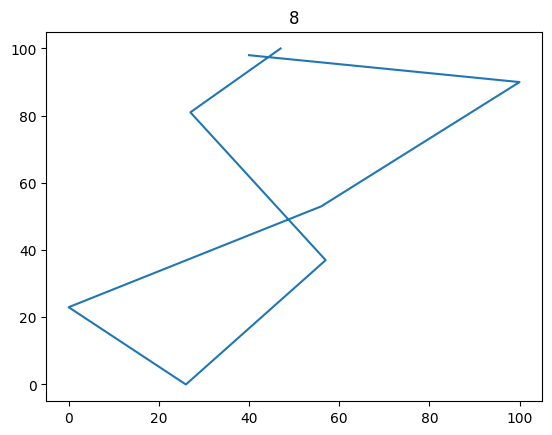

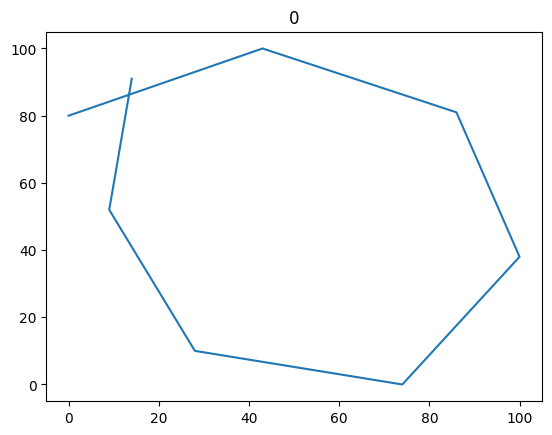

In [9]:
print_digit(data.iloc[0])
print_digit(data.iloc[100])

## Principal component analysis

In [14]:
X= data.values[:,0:16]
y = data.values[:,16]

pca = PCA(n_components ="mle", svd_solver="full")
transformed_X = pca.fit_transform(X)

In [15]:
print("the first three principale components explain", pca.explained_variance_ratio_[0:3].sum(), "of the variance")

the first three principale components explain 0.6858149520511267 of the variance


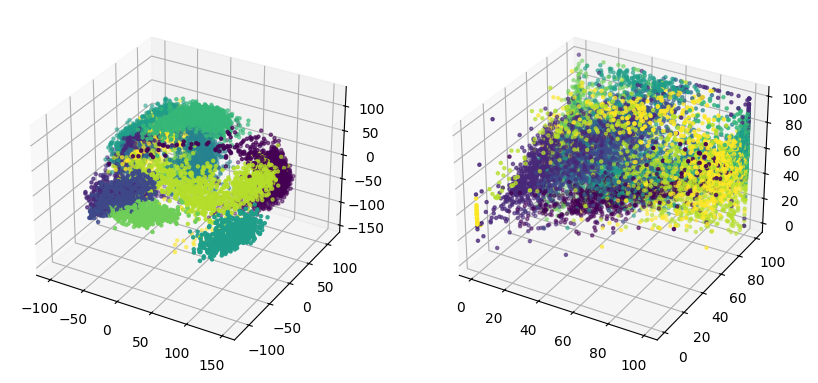

In [16]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.scatter(transformed_X[:,0], transformed_X[:,1], transformed_X[:,2], c=y, s=5)

ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.scatter(X[:,0], X[:,1], X[:,2], c=y, s=5)

plt.show()